# Data-Centric Challenge
__Objetivo__

+ Refinar, modificar, crear nuevos datos para un modelo concreto
+ https://worksheets.codalab.org/worksheets/0x7a8721f11e61436e93ac8f76da83f0e6


In [1]:
#Importamos librerias
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from pathlib import Path
import math
import cv2
import os
from pathlib import Path
from glob import glob
import albumentations as A


In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.callback.fp16 import *
from fastai.vision import *
import fastai
import torch
from fastai.callback.all import SaveModelCallback

In [3]:
print("Versión de fastai: ",fastai.__version__)

Versión de fastai:  2.2.5


In [4]:
print("GPU a utilizar: ",torch.cuda.get_device_name(0))

GPU a utilizar:  GeForce GTX 1080 Ti


In [5]:
#Muestra y guarda los graficos en el notebook
%matplotlib inline
#Recarga automaticamente los modulos tras ejecutar cada celda
%reload_ext autoreload
%autoreload 2

In [6]:
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

# Iteracion sin tocar los datos

In [7]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [8]:
imagenes_train=get_image_files(path/'train')
imagenes_train_i=get_image_files(path/'train'/'i')
imagenes_train_ii=get_image_files(path/'train'/'ii')
imagenes_train_iii=get_image_files(path/'train'/'iii')
imagenes_train_iv=get_image_files(path/'train'/'iv')
imagenes_train_v=get_image_files(path/'train'/'v')
imagenes_train_vi=get_image_files(path/'train'/'vi')
imagenes_train_vii=get_image_files(path/'train'/'vii')
imagenes_train_viii=get_image_files(path/'train'/'viii')
imagenes_train_ix=get_image_files(path/'train'/'ix')
imagenes_train_x=get_image_files(path/'train'/'x')
print('Imagenes en train: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train:  2067
Imagenes en i:  261 ( 12.63 %)
Imagenes en ii:  157 ( 7.6 %)
Imagenes en iii:  186 ( 9.0 %)
Imagenes en iv:  281 ( 13.59 %)
Imagenes en v:  196 ( 9.48 %)
Imagenes en vi:  181 ( 8.76 %)
Imagenes en vii:  193 ( 9.34 %)
Imagenes en viii:  199 ( 9.63 %)
Imagenes en ix:  234 ( 11.32 %)
Imagenes en x:  179 ( 8.66 %)


In [9]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  813
Imagenes en i:  82 ( 10.09 %)
Imagenes en ii:  81 ( 9.96 %)
Imagenes en iii:  79 ( 9.72 %)
Imagenes en iv:  84 ( 10.33 %)
Imagenes en v:  83 ( 10.21 %)
Imagenes en vi:  82 ( 10.09 %)
Imagenes en vii:  77 ( 9.47 %)
Imagenes en viii:  83 ( 10.21 %)
Imagenes en ix:  81 ( 9.96 %)
Imagenes en x:  81 ( 9.96 %)


## Creamos un dataframe

In [10]:
imagenes_train=get_image_files(path/'train')
imagenes_val=get_image_files(path/'val')

In [11]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

2066


In [12]:
df

,nombre_imagen,set,clase
0,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train,x
1,af9dd8c0-ce5d-11eb-b317-38f9d35ea60f.png,train,x
2,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train,x
3,afd81b98-ce5d-11eb-b317-38f9d35ea60f.png,train,x
4,b00213e4-ce5d-11eb-b317-38f9d35ea60f.png,train,x
...,...,...,...
2875,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2876,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2877,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2878,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

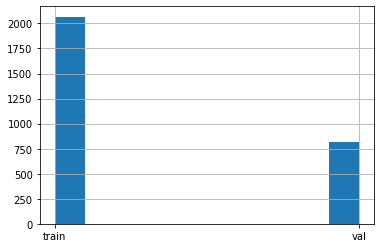

In [13]:
df.set.hist()

## Entrenamos

In [14]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [15]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [16]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))

In [17]:
dls = dblock.dataloaders(df)

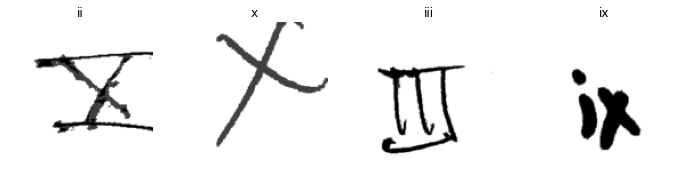

In [18]:
dls.train.show_batch(max_n=4, nrows=1)

In [20]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
lr_min,lr_steep = learn.lr_find()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(10,freeze_epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,3.301423,2.844817,0.868389,00:05
1,2.699612,2.508195,0.816728,00:04
2,2.271430,2.443165,0.779828,00:04
3,1.955248,2.624295,0.795818,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.414253,2.465883,0.778598,00:05
1,1.248862,2.204735,0.730627,00:05
2,1.106924,2.115783,0.724477,00:05
3,0.960673,1.895967,0.694957,00:05
4,0.817650,1.828834,0.656827,00:05
5,0.713460,1.792751,0.650676,00:05
6,0.615562,2.178663,0.712177,00:05
7,0.534764,2.073829,0.701107,00:05
8,0.484526,2.117251,0.685117,00:05
9,0.446154,2.121731,0.688807,00:05


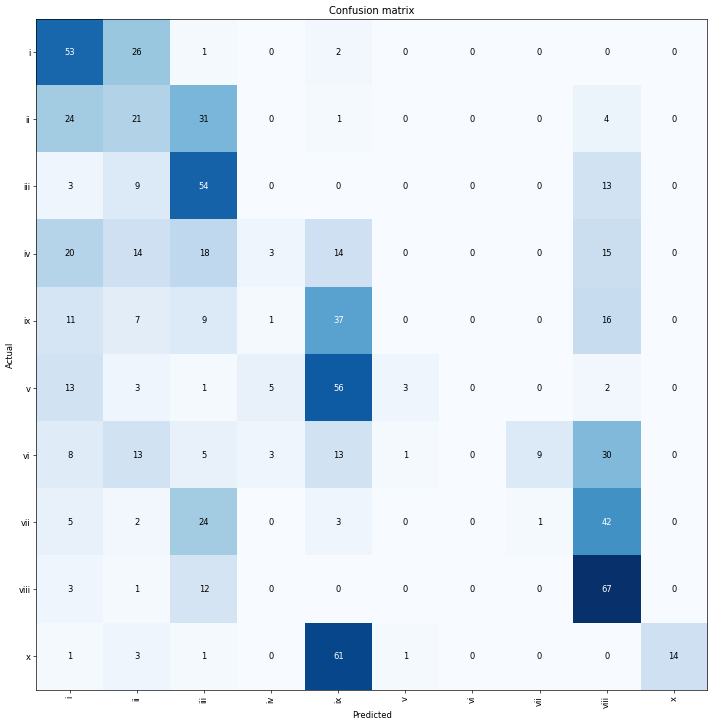

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

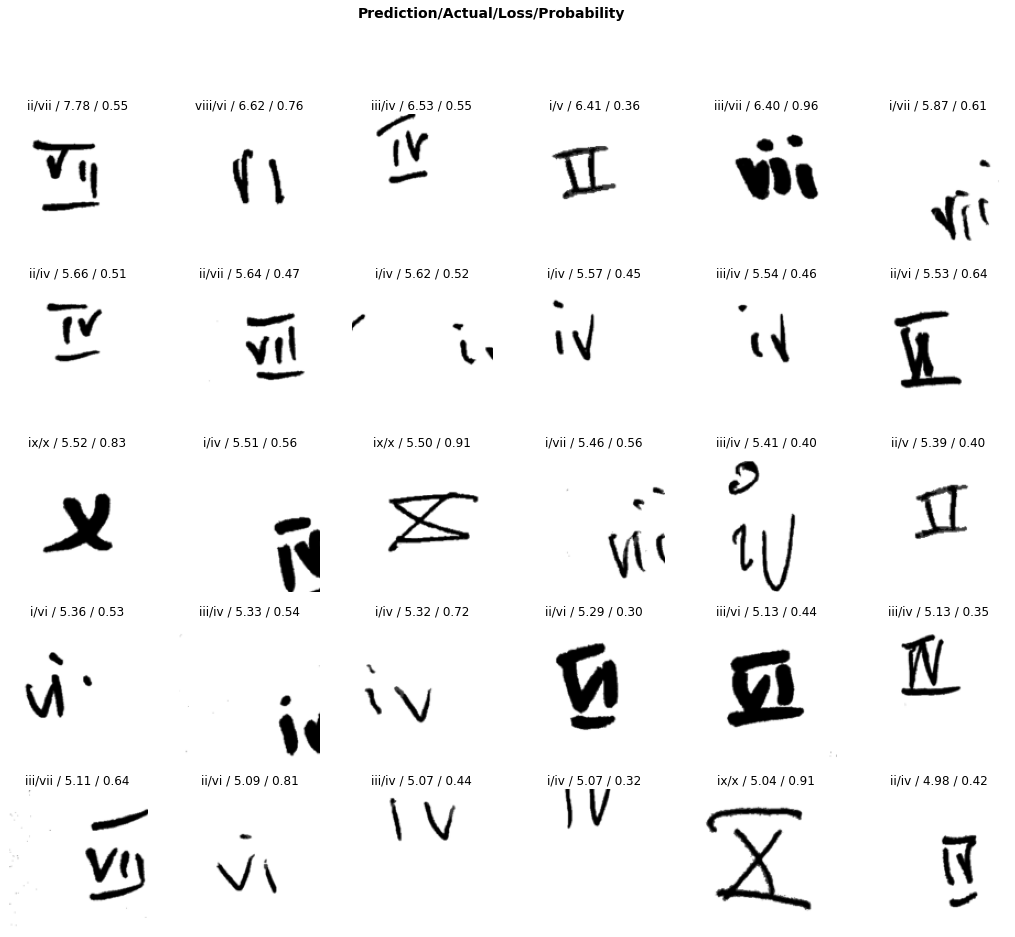

In [29]:
interp.plot_top_losses(30, nrows=5)

In [24]:
interp.most_confused(min_val=5)

[('x', 'ix', 61),
 ('v', 'ix', 56),
 ('vii', 'viii', 42),
 ('ii', 'iii', 31),
 ('vi', 'viii', 30),
 ('i', 'ii', 26),
 ('ii', 'i', 24),
 ('vii', 'iii', 24),
 ('iv', 'i', 20),
 ('iv', 'iii', 18),
 ('ix', 'viii', 16),
 ('iv', 'viii', 15),
 ('iv', 'ii', 14),
 ('iv', 'ix', 14),
 ('iii', 'viii', 13),
 ('v', 'i', 13),
 ('vi', 'ii', 13),
 ('vi', 'ix', 13),
 ('viii', 'iii', 12),
 ('ix', 'i', 11),
 ('iii', 'ii', 9),
 ('ix', 'iii', 9),
 ('vi', 'vii', 9),
 ('vi', 'i', 8),
 ('ix', 'ii', 7),
 ('v', 'iv', 5),
 ('vi', 'iii', 5),
 ('vii', 'i', 5)]

# Segunda Iteracion: Mismo entrenamiento tras limpiar datos (eliminación ejemplos que no eran numeros y reestructuración de ejemplos mal etiquetados)

In [7]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [8]:
imagenes_train=get_image_files(path/'train')
imagenes_train_i=get_image_files(path/'train'/'i')
imagenes_train_ii=get_image_files(path/'train'/'ii')
imagenes_train_iii=get_image_files(path/'train'/'iii')
imagenes_train_iv=get_image_files(path/'train'/'iv')
imagenes_train_v=get_image_files(path/'train'/'v')
imagenes_train_vi=get_image_files(path/'train'/'vi')
imagenes_train_vii=get_image_files(path/'train'/'vii')
imagenes_train_viii=get_image_files(path/'train'/'viii')
imagenes_train_ix=get_image_files(path/'train'/'ix')
imagenes_train_x=get_image_files(path/'train'/'x')
print('Imagenes en train: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train:  1922
Imagenes en i:  253 ( 13.16 %)
Imagenes en ii:  159 ( 8.27 %)
Imagenes en iii:  170 ( 8.84 %)
Imagenes en iv:  261 ( 13.58 %)
Imagenes en v:  179 ( 9.31 %)
Imagenes en vi:  167 ( 8.69 %)
Imagenes en vii:  172 ( 8.95 %)
Imagenes en viii:  175 ( 9.11 %)
Imagenes en ix:  206 ( 10.72 %)
Imagenes en x:  180 ( 9.37 %)


+ Podriamos añadir mas ejemplos de las clases: ii, iii, v, vi, vii

In [9]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  812
Imagenes en i:  82 ( 10.1 %)
Imagenes en ii:  83 ( 10.22 %)
Imagenes en iii:  80 ( 9.85 %)
Imagenes en iv:  86 ( 10.59 %)
Imagenes en v:  80 ( 9.85 %)
Imagenes en vi:  80 ( 9.85 %)
Imagenes en vii:  77 ( 9.48 %)
Imagenes en viii:  82 ( 10.1 %)
Imagenes en ix:  81 ( 9.98 %)
Imagenes en x:  81 ( 9.98 %)


## Creamos un dataframe

In [10]:
imagenes_train=get_image_files(path/'train')
imagenes_val=get_image_files(path/'val')

In [11]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

1921


In [12]:
df

,nombre_imagen,set,clase
0,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train,x
1,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train,x
2,afd81b98-ce5d-11eb-b317-38f9d35ea60f.png,train,x
3,b00213e4-ce5d-11eb-b317-38f9d35ea60f.png,train,x
4,aabf4b04-ce5d-11eb-b317-38f9d35ea60f.png,train,x
...,...,...,...
2729,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2730,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2731,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2732,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

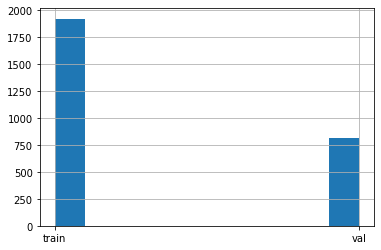

In [13]:
df.set.hist()

## Entrenamos

In [14]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [15]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [16]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))

In [17]:
dls = dblock.dataloaders(df)

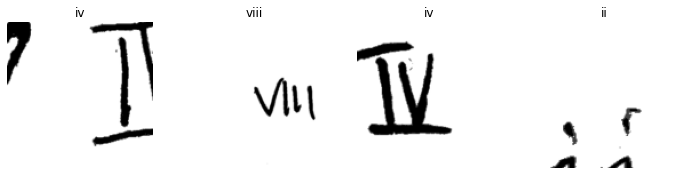

In [18]:
dls.train.show_batch(max_n=4, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

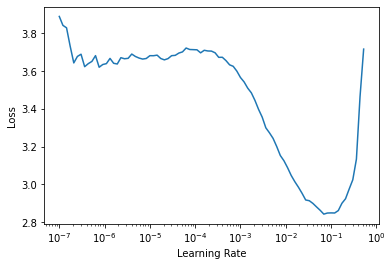

In [20]:
lr_min,lr_steep = learn.lr_find()

In [21]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.fine_tune(10,freeze_epochs=4)

epoch,train_loss,valid_loss,error_rate,time
0,3.282796,2.540062,0.885468,00:05
1,2.617676,2.601336,0.810345,00:04
2,2.144732,2.672260,0.768473,00:04
3,1.849671,2.357961,0.751232,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.325994,2.322338,0.720443,00:05
1,1.128706,2.295470,0.726601,00:05
2,0.971687,1.875803,0.652709,00:05
3,0.812630,2.057332,0.683498,00:05
4,0.677763,2.221895,0.667488,00:05
5,0.575765,2.159589,0.640394,00:05
6,0.479114,2.084441,0.608374,00:05
7,0.412514,2.021406,0.614532,00:05
8,0.370120,2.167939,0.642857,00:05
9,0.348978,2.051667,0.633005,00:05


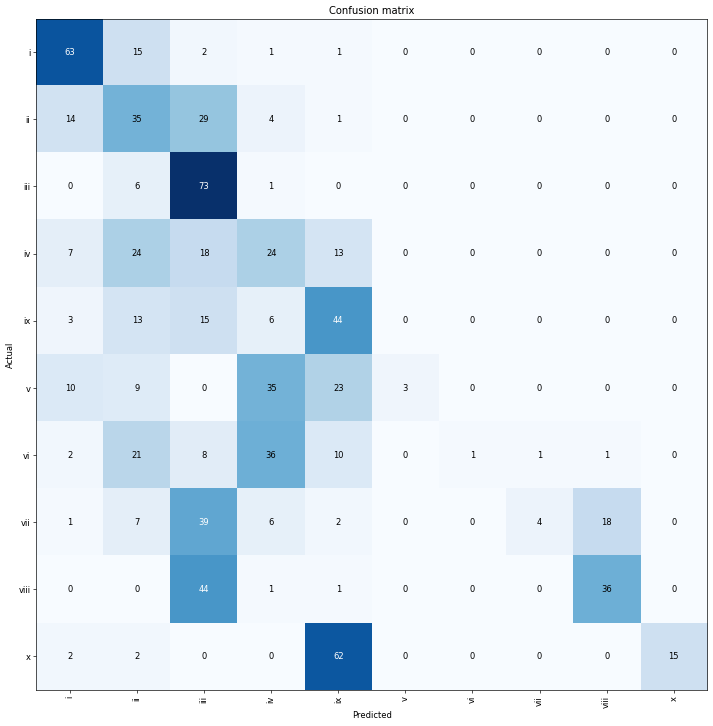

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

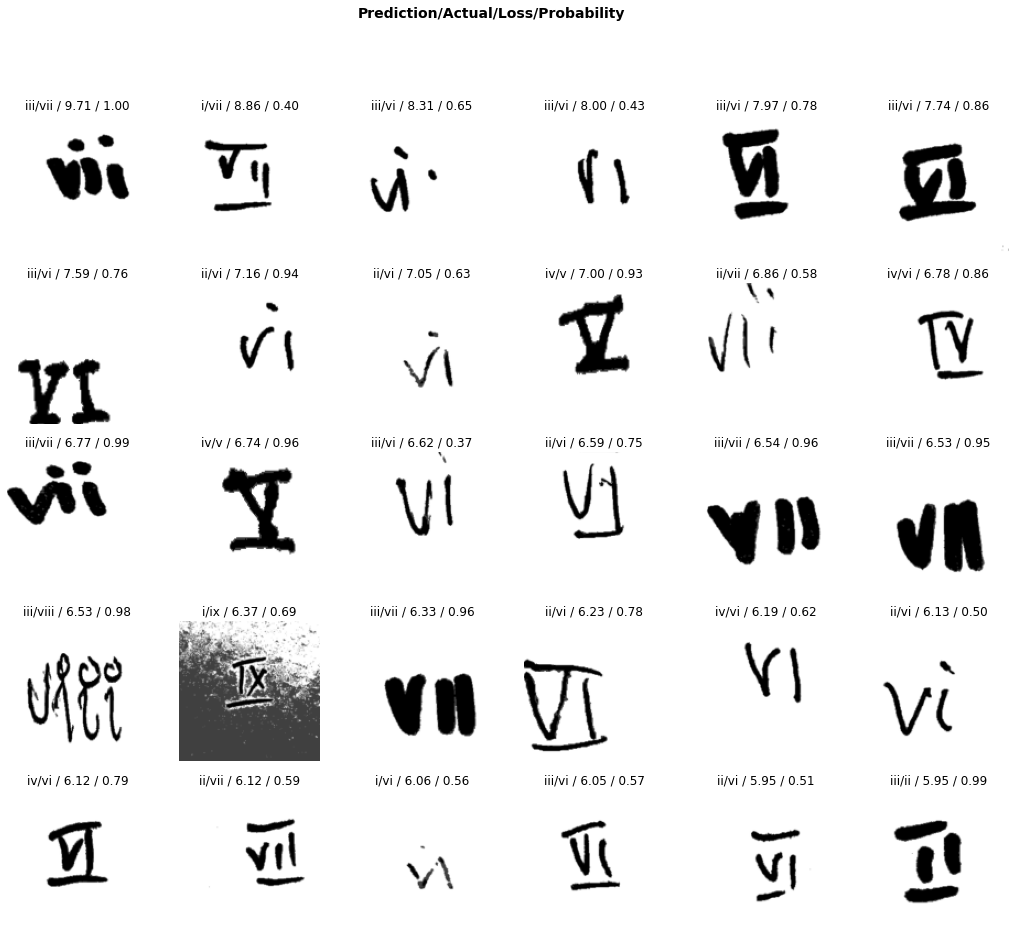

In [23]:
interp.plot_top_losses(30, nrows=5)

In [25]:
interp.most_confused(min_val=5)

[('x', 'ix', 62),
 ('viii', 'iii', 44),
 ('vii', 'iii', 39),
 ('vi', 'iv', 36),
 ('v', 'iv', 35),
 ('ii', 'iii', 29),
 ('iv', 'ii', 24),
 ('v', 'ix', 23),
 ('vi', 'ii', 21),
 ('iv', 'iii', 18),
 ('vii', 'viii', 18),
 ('i', 'ii', 15),
 ('ix', 'iii', 15),
 ('ii', 'i', 14),
 ('iv', 'ix', 13),
 ('ix', 'ii', 13),
 ('v', 'i', 10),
 ('vi', 'ix', 10),
 ('v', 'ii', 9),
 ('vi', 'iii', 8),
 ('iv', 'i', 7),
 ('vii', 'ii', 7),
 ('iii', 'ii', 6),
 ('ix', 'iv', 6),
 ('vii', 'iv', 6)]

+ Parece que algo ha mejorado pero tampoco mucho

# Tercera Iteracion: Vamos a cambiar algunos parametros del entrenamiento sin tocar los datos

In [7]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [8]:
imagenes_train=get_image_files(path/'train')
imagenes_train_i=get_image_files(path/'train'/'i')
imagenes_train_ii=get_image_files(path/'train'/'ii')
imagenes_train_iii=get_image_files(path/'train'/'iii')
imagenes_train_iv=get_image_files(path/'train'/'iv')
imagenes_train_v=get_image_files(path/'train'/'v')
imagenes_train_vi=get_image_files(path/'train'/'vi')
imagenes_train_vii=get_image_files(path/'train'/'vii')
imagenes_train_viii=get_image_files(path/'train'/'viii')
imagenes_train_ix=get_image_files(path/'train'/'ix')
imagenes_train_x=get_image_files(path/'train'/'x')
print('Imagenes en train: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train:  1922
Imagenes en i:  253 ( 13.16 %)
Imagenes en ii:  159 ( 8.27 %)
Imagenes en iii:  170 ( 8.84 %)
Imagenes en iv:  261 ( 13.58 %)
Imagenes en v:  179 ( 9.31 %)
Imagenes en vi:  167 ( 8.69 %)
Imagenes en vii:  172 ( 8.95 %)
Imagenes en viii:  175 ( 9.11 %)
Imagenes en ix:  206 ( 10.72 %)
Imagenes en x:  180 ( 9.37 %)


+ Podriamos añadir mas ejemplos de las clases: ii, iii, v, vi, vii

In [9]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  812
Imagenes en i:  82 ( 10.1 %)
Imagenes en ii:  83 ( 10.22 %)
Imagenes en iii:  80 ( 9.85 %)
Imagenes en iv:  86 ( 10.59 %)
Imagenes en v:  80 ( 9.85 %)
Imagenes en vi:  80 ( 9.85 %)
Imagenes en vii:  77 ( 9.48 %)
Imagenes en viii:  82 ( 10.1 %)
Imagenes en ix:  81 ( 9.98 %)
Imagenes en x:  81 ( 9.98 %)


## Creamos un dataframe

In [10]:
imagenes_train=get_image_files(path/'train')
imagenes_val=get_image_files(path/'val')

In [11]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

In [12]:
df

,nombre_imagen,set,clase
0,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train,x
1,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train,x
2,afd81b98-ce5d-11eb-b317-38f9d35ea60f.png,train,x
3,b00213e4-ce5d-11eb-b317-38f9d35ea60f.png,train,x
4,aabf4b04-ce5d-11eb-b317-38f9d35ea60f.png,train,x
...,...,...,...
2729,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2730,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2731,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2732,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

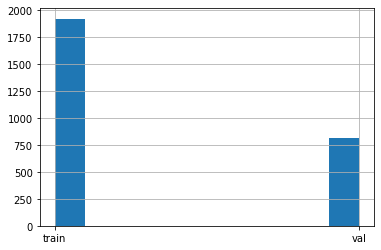

In [13]:
df.set.hist()

## Entrenamos

In [14]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [15]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [16]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(356,method=ResizeMethod.Pad,pad_mode='zeros'),
                   batch_tfms=aug_transforms(do_flip=False,flip_vert=False))

In [17]:
dls = dblock.dataloaders(df,bs = 128)

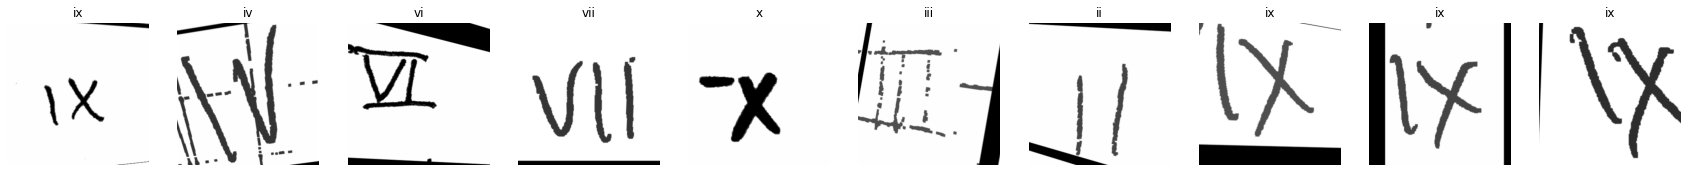

In [18]:
dls.train.show_batch(max_n=10, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

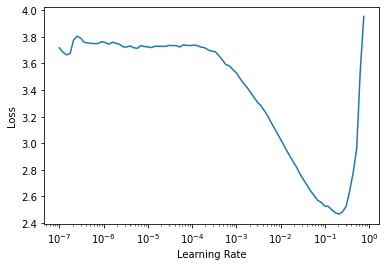

In [20]:
lr_min,lr_steep = learn.lr_find()

In [21]:
learn.fine_tune(40)

epoch,train_loss,valid_loss,error_rate,time
0,3.147578,2.231067,0.701970,00:15


epoch,train_loss,valid_loss,error_rate,time
0,2.059255,2.249010,0.694581,00:18
1,1.812724,2.079759,0.655172,00:17
2,1.567888,2.032727,0.653941,00:18
3,1.340933,1.920780,0.602217,00:18
4,1.120509,1.759697,0.545566,00:18
5,0.937329,1.571424,0.507389,00:18
6,0.764740,1.631732,0.472906,00:18
7,0.622750,1.500564,0.448276,00:18
8,0.505629,1.528865,0.432266,00:18
9,0.413631,1.536698,0.464286,00:18


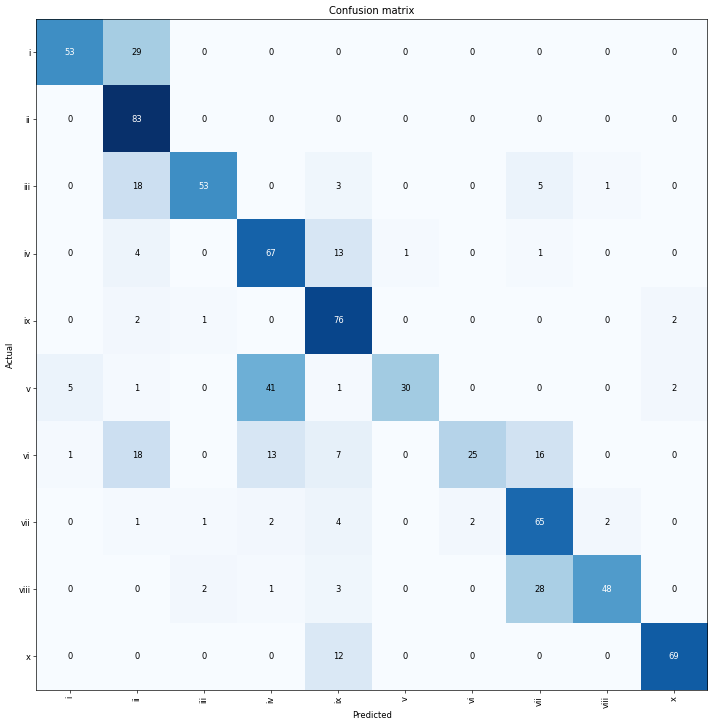

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

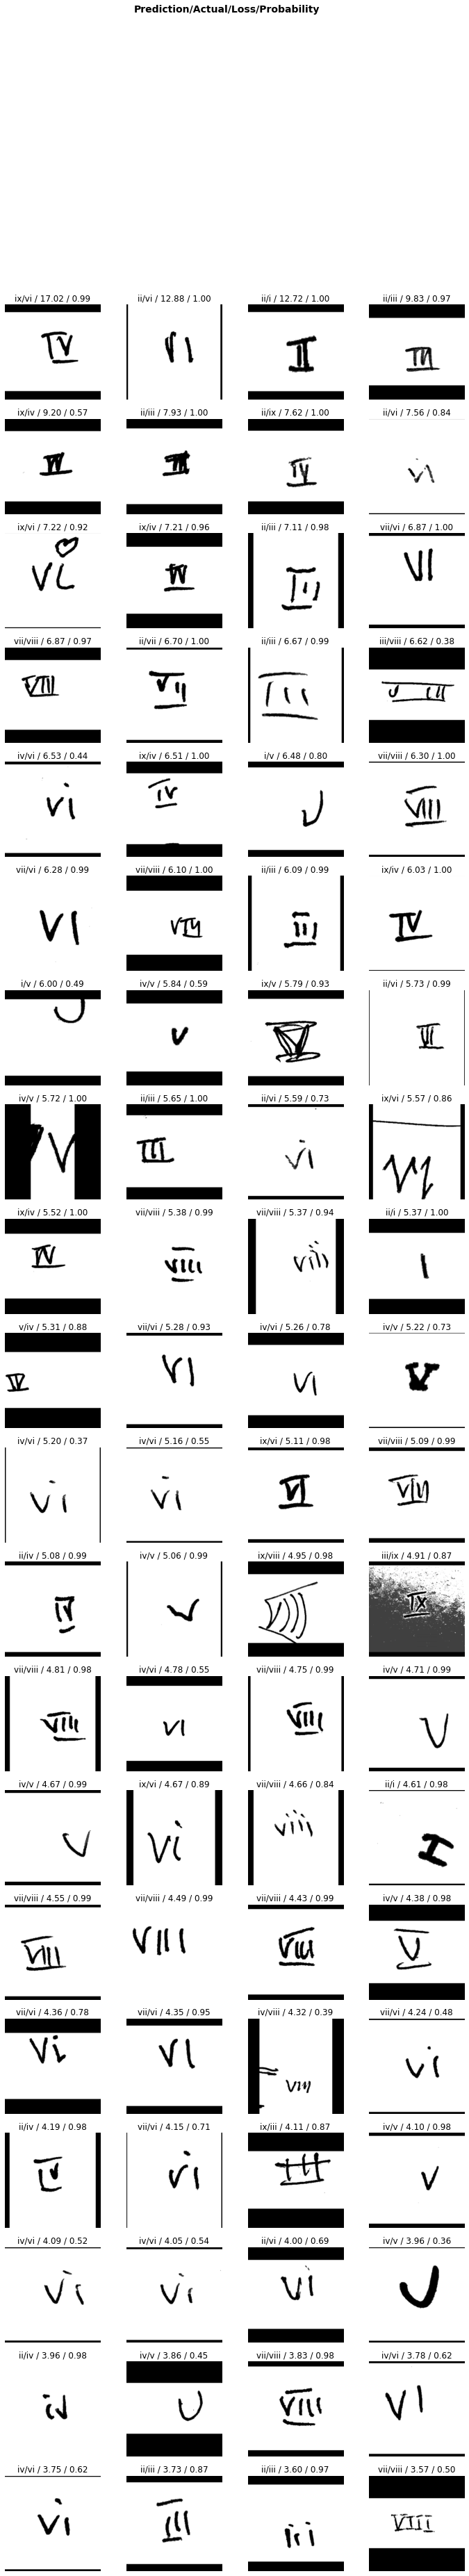

In [26]:
interp.plot_top_losses(80, nrows=20)

In [24]:
interp.most_confused(min_val=5)

[('v', 'iv', 41),
 ('i', 'ii', 29),
 ('viii', 'vii', 28),
 ('iii', 'ii', 18),
 ('vi', 'ii', 18),
 ('vi', 'vii', 16),
 ('iv', 'ix', 13),
 ('vi', 'iv', 13),
 ('x', 'ix', 12),
 ('vi', 'ix', 7),
 ('iii', 'vii', 5),
 ('v', 'i', 5)]

+ Parece que algo ha mejorado pero tampoco mucho

# Cuarta Iteracion: Cambiamos los parametros de entrenamiento para ajustarlos a la competición: https://worksheets.codalab.org/worksheets/0x7a8721f11e61436e93ac8f76da83f0e6

In [7]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [8]:
imagenes_train=get_image_files(path/'train')
imagenes_train_i=get_image_files(path/'train'/'i')
imagenes_train_ii=get_image_files(path/'train'/'ii')
imagenes_train_iii=get_image_files(path/'train'/'iii')
imagenes_train_iv=get_image_files(path/'train'/'iv')
imagenes_train_v=get_image_files(path/'train'/'v')
imagenes_train_vi=get_image_files(path/'train'/'vi')
imagenes_train_vii=get_image_files(path/'train'/'vii')
imagenes_train_viii=get_image_files(path/'train'/'viii')
imagenes_train_ix=get_image_files(path/'train'/'ix')
imagenes_train_x=get_image_files(path/'train'/'x')
print('Imagenes en train: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train:  1892
Imagenes en i:  253 ( 13.37 %)
Imagenes en ii:  159 ( 8.4 %)
Imagenes en iii:  147 ( 7.77 %)
Imagenes en iv:  259 ( 13.69 %)
Imagenes en v:  178 ( 9.41 %)
Imagenes en vi:  165 ( 8.72 %)
Imagenes en vii:  176 ( 9.3 %)
Imagenes en viii:  175 ( 9.25 %)
Imagenes en ix:  205 ( 10.84 %)
Imagenes en x:  175 ( 9.25 %)


+ Podriamos añadir mas ejemplos de las clases: ii, iii, v, vi, vii, viii, x

In [10]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  811
Imagenes en i:  82 ( 10.11 %)
Imagenes en ii:  83 ( 10.23 %)
Imagenes en iii:  80 ( 9.86 %)
Imagenes en iv:  87 ( 10.73 %)
Imagenes en v:  79 ( 9.74 %)
Imagenes en vi:  79 ( 9.74 %)
Imagenes en vii:  77 ( 9.49 %)
Imagenes en viii:  82 ( 10.11 %)
Imagenes en ix:  81 ( 9.99 %)
Imagenes en x:  81 ( 9.99 %)


## Creamos un dataframe

In [11]:
imagenes_train=get_image_files(path/'train')
imagenes_val=get_image_files(path/'val')

In [12]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

In [13]:
df

,nombre_imagen,set,clase
0,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train,x
1,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train,x
2,afd81b98-ce5d-11eb-b317-38f9d35ea60f.png,train,x
3,b00213e4-ce5d-11eb-b317-38f9d35ea60f.png,train,x
4,aabf4b04-ce5d-11eb-b317-38f9d35ea60f.png,train,x
...,...,...,...
2698,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2699,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2700,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
2701,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

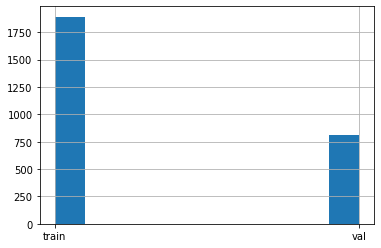

In [14]:
df.set.hist()

## Entrenamos

In [15]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [16]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [17]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(32,method=ResizeMethod.Pad,pad_mode='zeros'),
                   batch_tfms=aug_transforms(do_flip=False,flip_vert=False))

In [18]:
dls = dblock.dataloaders(df,bs = 8)

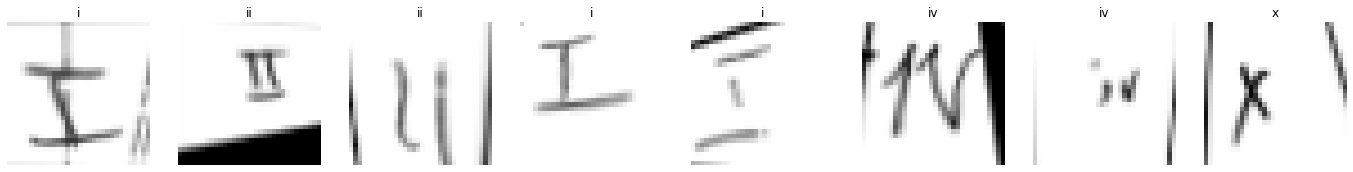

In [19]:
dls.train.show_batch(max_n=10, nrows=1)

In [20]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()

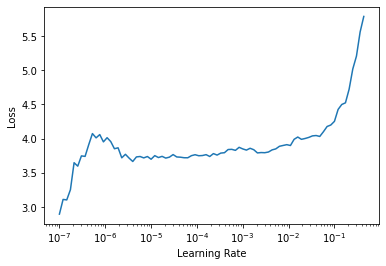

In [21]:
lr_min,lr_steep = learn.lr_find()

In [22]:
learn.fine_tune(30)

epoch,train_loss,valid_loss,accuracy,time
0,3.245251,116.567818,0.091245,00:22


epoch,train_loss,valid_loss,accuracy,time
0,2.903353,49.359638,0.097411,00:27
1,2.528017,21.415972,0.108508,00:26
2,2.307671,31.729958,0.099877,00:27
3,2.279082,18.068581,0.096178,00:27
4,2.110781,16.289200,0.096178,00:26
5,1.946967,6.301355,0.127004,00:27
6,1.863358,3.312631,0.124538,00:27
7,1.760029,2.213700,0.212084,00:27
8,1.716392,1.987520,0.276202,00:27
9,1.595717,2.315579,0.241677,00:27


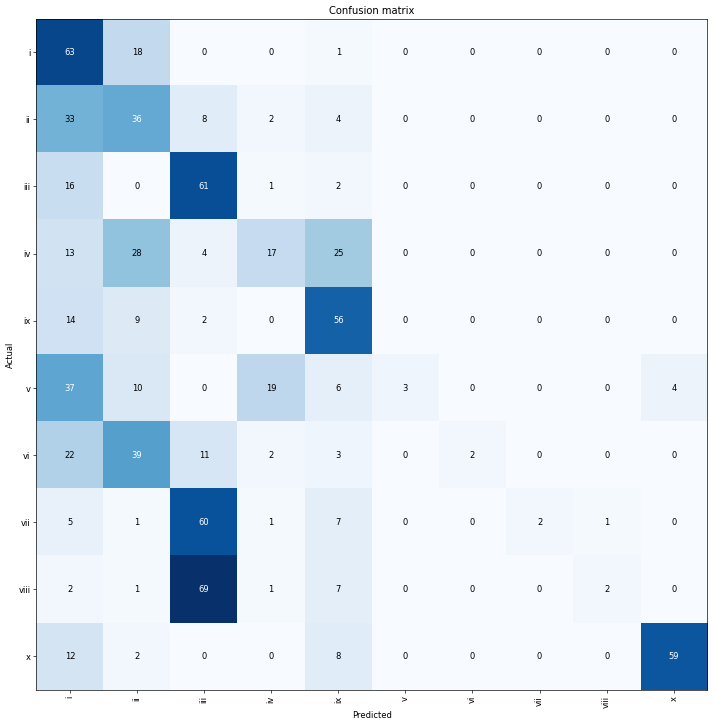

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

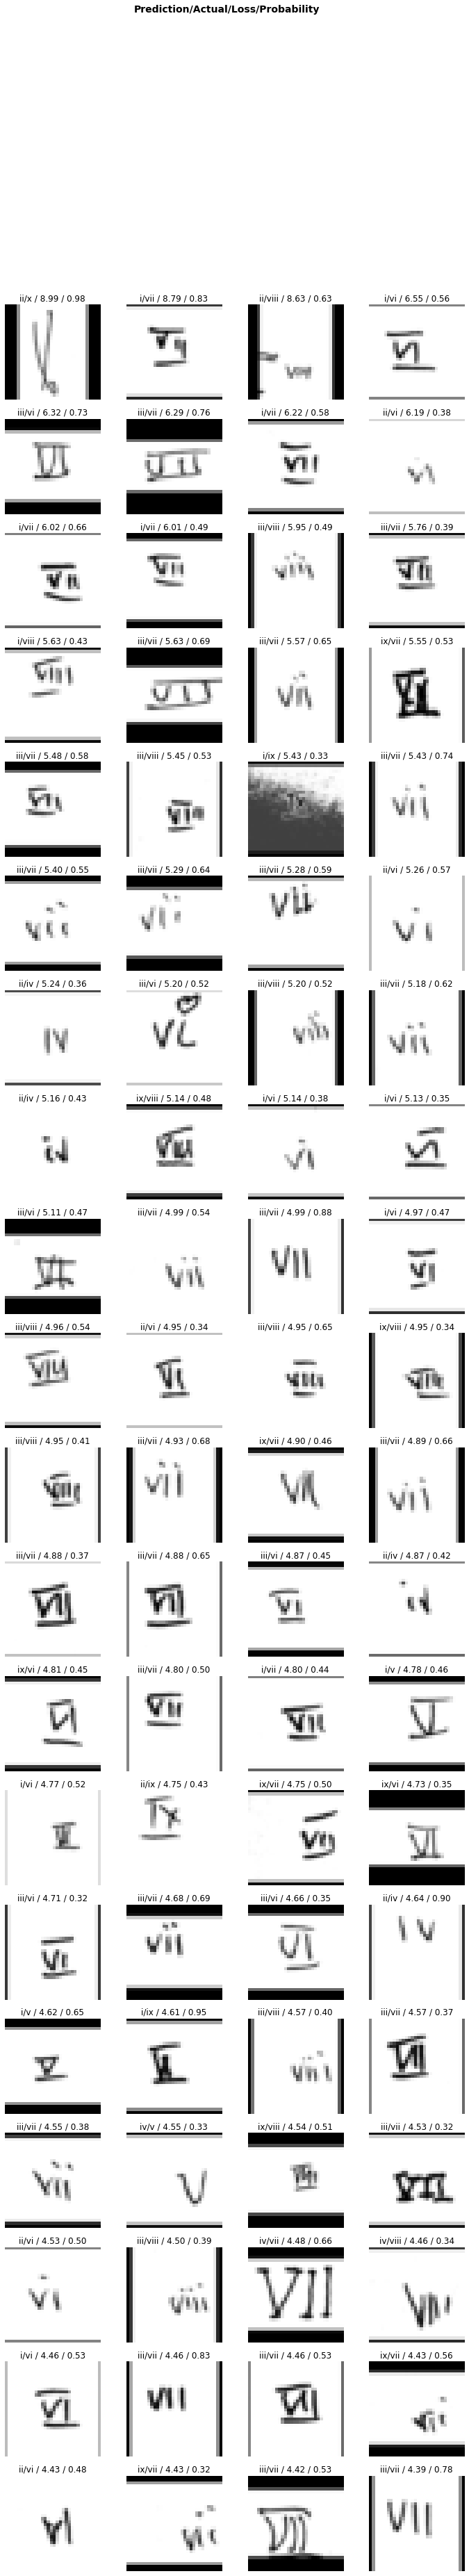

In [24]:
interp.plot_top_losses(80, nrows=20)

In [25]:
interp.most_confused(min_val=5)

[('viii', 'iii', 69),
 ('vii', 'iii', 60),
 ('vi', 'ii', 39),
 ('v', 'i', 37),
 ('ii', 'i', 33),
 ('iv', 'ii', 28),
 ('iv', 'ix', 25),
 ('vi', 'i', 22),
 ('v', 'iv', 19),
 ('i', 'ii', 18),
 ('iii', 'i', 16),
 ('ix', 'i', 14),
 ('iv', 'i', 13),
 ('x', 'i', 12),
 ('vi', 'iii', 11),
 ('v', 'ii', 10),
 ('ix', 'ii', 9),
 ('ii', 'iii', 8),
 ('x', 'ix', 8),
 ('vii', 'ix', 7),
 ('viii', 'ix', 7),
 ('v', 'ix', 6),
 ('vii', 'i', 5)]

# Creacion de nuevas imagenes

+ Maravillosa libreria

https://github.com/albumentations-team/albumentations#pixel-level-transforms

https://albumentations-demo.herokuapp.com/

+ Vamos a crear imagenes hasta tener 500 de cada clase

In [232]:
imagenes_train=get_image_files(path/'train')
imagenes_train_i=get_image_files(path/'train'/'i')
imagenes_train_ii=get_image_files(path/'train'/'ii')
imagenes_train_iii=get_image_files(path/'train'/'iii')
imagenes_train_iv=get_image_files(path/'train'/'iv')
imagenes_train_v=get_image_files(path/'train'/'v')
imagenes_train_vi=get_image_files(path/'train'/'vi')
imagenes_train_vii=get_image_files(path/'train'/'vii')
imagenes_train_viii=get_image_files(path/'train'/'viii')
imagenes_train_ix=get_image_files(path/'train'/'ix')
imagenes_train_x=get_image_files(path/'train'/'x')
print('Imagenes en train: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')

Imagenes en train:  1891
Imagenes en i:  253 ( 13.38 %)
Imagenes en ii:  158 ( 8.36 %)
Imagenes en iii:  147 ( 7.77 %)
Imagenes en iv:  259 ( 13.7 %)
Imagenes en v:  178 ( 9.41 %)
Imagenes en vi:  165 ( 8.73 %)
Imagenes en vii:  176 ( 9.31 %)
Imagenes en viii:  175 ( 9.25 %)
Imagenes en ix:  205 ( 10.84 %)
Imagenes en x:  175 ( 9.25 %)


In [234]:
imagenes_deseadas=500

In [254]:
imagenes_a_crear_clase_i=imagenes_deseadas-len(imagenes_train_i)
imagenes_a_crear_clase_ii=imagenes_deseadas-len(imagenes_train_ii)
imagenes_a_crear_clase_iii=imagenes_deseadas-len(imagenes_train_iii)
imagenes_a_crear_clase_iv=imagenes_deseadas-len(imagenes_train_iv)
imagenes_a_crear_clase_v=imagenes_deseadas-len(imagenes_train_v)
imagenes_a_crear_clase_vi=imagenes_deseadas-len(imagenes_train_vi)
imagenes_a_crear_clase_vii=imagenes_deseadas-len(imagenes_train_vii)
imagenes_a_crear_clase_viii=imagenes_deseadas-len(imagenes_train_viii)
imagenes_a_crear_clase_ix=imagenes_deseadas-len(imagenes_train_ix)
imagenes_a_crear_clase_x=imagenes_deseadas-len(imagenes_train_x)

In [285]:
clase='x'

numero_imagenes_a_crear=imagenes_a_crear_clase_x
numero_imagenes_a_crear
numero_veces_imagen=round(numero_imagenes_a_crear/len(imagenes_train_x))
print('Vamos a crear: '+str(numero_imagenes_a_crear)+'. Numero de imagenes nuevas por cada imagen original: '+str(numero_veces_imagen))

Vamos a crear: 325. Numero de imagenes nuevas por cada imagen original: 2


In [286]:
def visualize(image_ori,image_new):
    plt.figure(figsize=(5, 5))
    plt.subplot(1,2,1)
    plt.imshow(image_ori)
    plt.subplot(1,2,2)
    plt.imshow(image_new)
    plt.show()
    

input_files=get_image_files(path/'train'/clase)
creadas=0
input_folder='/host_dir/home/adrian/extras/Data-centric/data/train/'+clase
output_folder=input_folder+'_augmented'
Path(output_folder).mkdir(parents=True, exist_ok=True)

input_files = glob(os.path.join(input_folder, "*.png"))
for f in input_files:
    image = cv2.imread(f)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for i in range(0,numero_veces_imagen):
        transform = A.Compose(
            [A.CLAHE(),
             A.Blur(blur_limit=3),
             A.OpticalDistortion(),
             A.GridDistortion(),
             A.RandomBrightnessContrast(),
             A.ShiftScaleRotate(rotate_limit=(-45,45),p=1.0)])

        augmented_image = transform(image=image)['image']
        #visualize(image,augmented_image)
        new_name=os.path.basename(f).split('.')[0]+'_augmented_'+str(i)+'.'+os.path.basename(f).split('.')[1]
        cv2.imwrite(os.path.join(output_folder, new_name), augmented_image)
        creadas+=1
    if(creadas>=numero_imagenes_a_crear):
        break


# Quinta Iteracion: Añadimos más ejemplos para entrenar

In [287]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [288]:
imagenes_train=get_image_files(path/'train_augmented')
imagenes_train_i=get_image_files(path/'train_augmented'/'i')
imagenes_train_ii=get_image_files(path/'train_augmented'/'ii')
imagenes_train_iii=get_image_files(path/'train_augmented'/'iii')
imagenes_train_iv=get_image_files(path/'train_augmented'/'iv')
imagenes_train_v=get_image_files(path/'train_augmented'/'v')
imagenes_train_vi=get_image_files(path/'train_augmented'/'vi')
imagenes_train_vii=get_image_files(path/'train_augmented'/'vii')
imagenes_train_viii=get_image_files(path/'train_augmented'/'viii')
imagenes_train_ix=get_image_files(path/'train_augmented'/'ix')
imagenes_train_x=get_image_files(path/'train_augmented'/'x')
print('Imagenes en train_augmented: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train_augmented:  4816
Imagenes en i:  497 ( 10.32 %)
Imagenes en ii:  471 ( 9.78 %)
Imagenes en iii:  441 ( 9.16 %)
Imagenes en iv:  500 ( 10.38 %)
Imagenes en v:  500 ( 10.38 %)
Imagenes en vi:  495 ( 10.28 %)
Imagenes en vii:  500 ( 10.38 %)
Imagenes en viii:  501 ( 10.4 %)
Imagenes en ix:  410 ( 8.51 %)
Imagenes en x:  501 ( 10.4 %)


In [289]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  811
Imagenes en i:  82 ( 10.11 %)
Imagenes en ii:  83 ( 10.23 %)
Imagenes en iii:  80 ( 9.86 %)
Imagenes en iv:  87 ( 10.73 %)
Imagenes en v:  79 ( 9.74 %)
Imagenes en vi:  79 ( 9.74 %)
Imagenes en vii:  77 ( 9.49 %)
Imagenes en viii:  82 ( 10.11 %)
Imagenes en ix:  81 ( 9.99 %)
Imagenes en x:  81 ( 9.99 %)


## Creamos un dataframe

In [290]:
imagenes_train=get_image_files(path/'train_augmented')
imagenes_val=get_image_files(path/'val')

In [291]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

In [292]:
df

,nombre_imagen,set,clase
0,afe0502e-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
1,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train_augmented,x
2,af9b508c-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
3,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train_augmented,x
4,afc80e24-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
...,...,...,...
5622,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5623,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5624,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5625,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

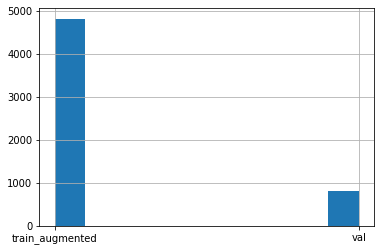

In [293]:
df.set.hist()

## Entrenamos

In [294]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [295]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [296]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(32,method=ResizeMethod.Pad,pad_mode='zeros'),
                   batch_tfms=aug_transforms(do_flip=False,flip_vert=False))

In [297]:
dls = dblock.dataloaders(df,bs = 8)

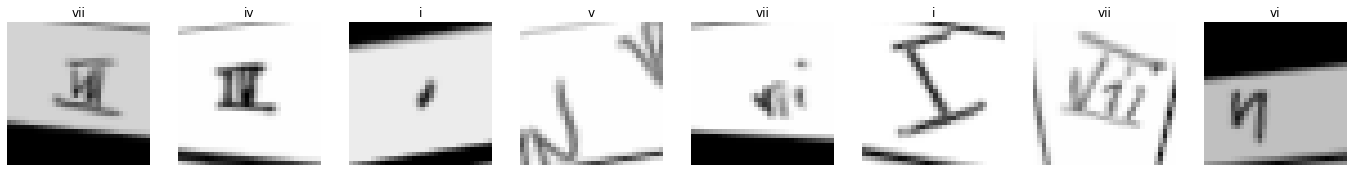

In [298]:
dls.train.show_batch(max_n=10, nrows=1)

In [299]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()

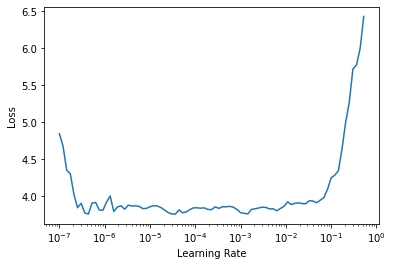

In [300]:
lr_min,lr_steep = learn.lr_find()

In [301]:
learn.fine_tune(30)

epoch,train_loss,valid_loss,accuracy,time
0,2.866343,11.465097,0.093711,00:52


epoch,train_loss,valid_loss,accuracy,time
0,2.393442,4.065667,0.086313,01:01
1,2.160579,11.624985,0.103576,01:03
2,1.845842,5.398324,0.128237,01:00
3,1.864047,2.699243,0.140567,01:03
4,1.724099,2.289719,0.196054,01:00
5,1.643494,2.161504,0.268804,01:03
6,1.609188,1.880115,0.360049,01:02
7,1.625368,1.939419,0.286067,01:03
8,1.463367,1.873982,0.287300,01:02
9,1.397263,1.823254,0.325524,01:02


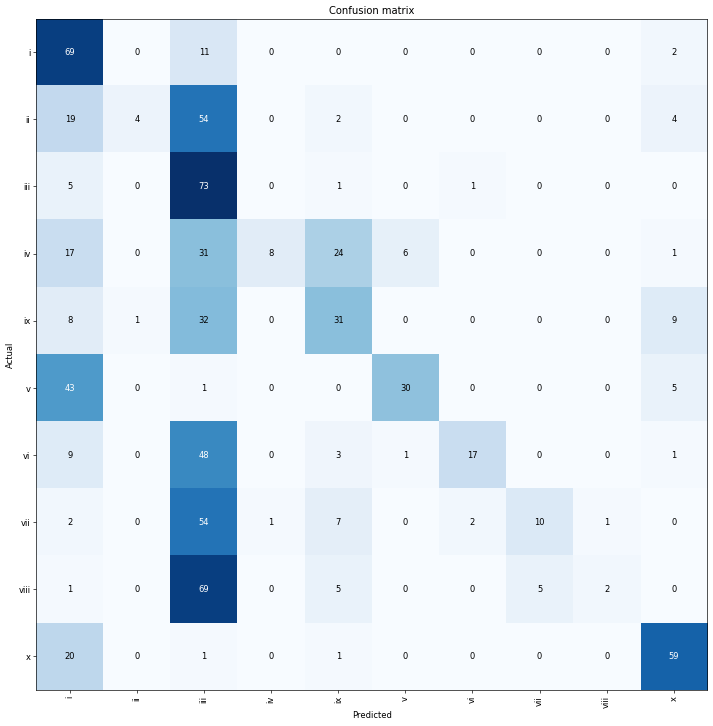

In [302]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

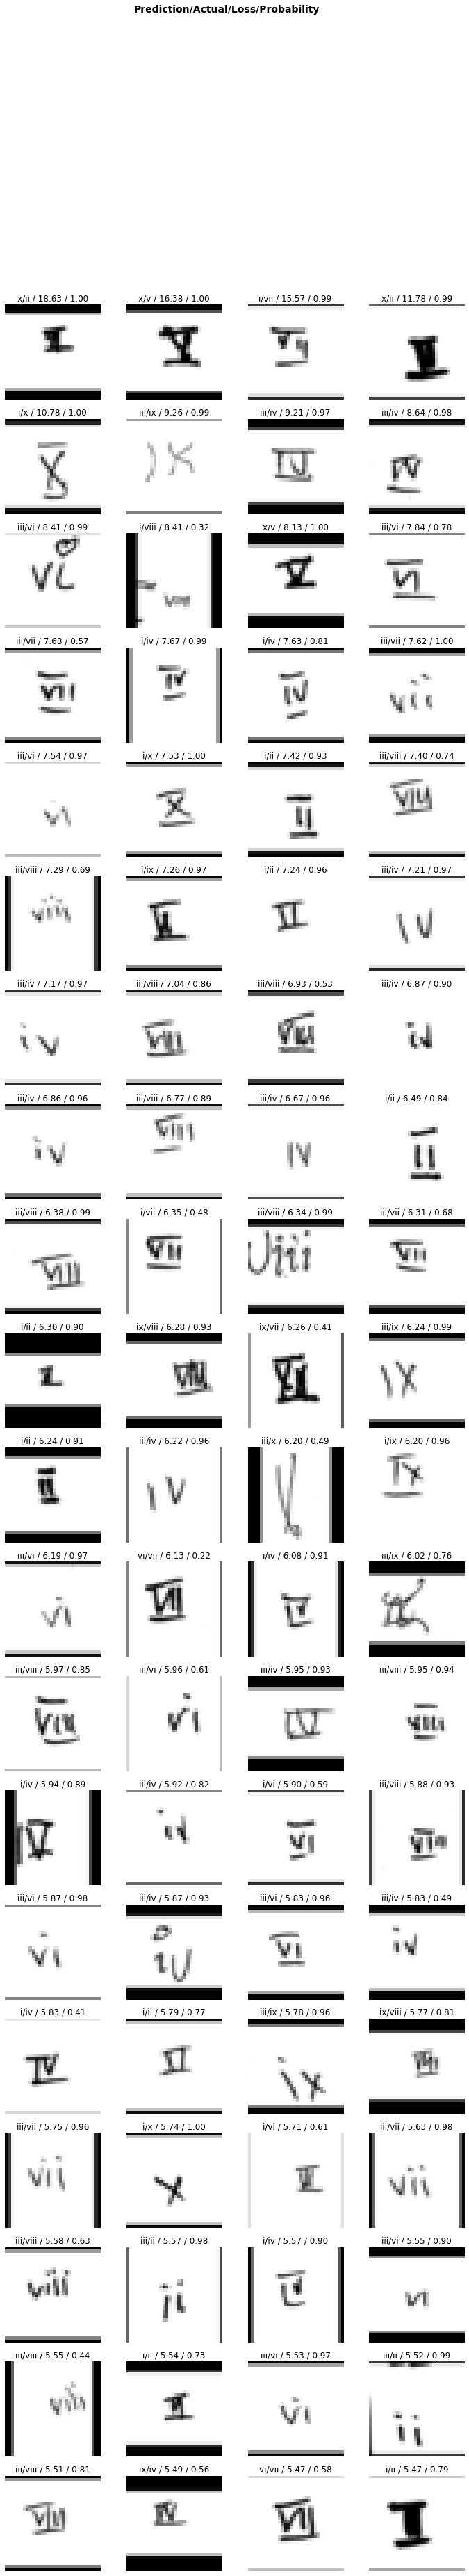

In [303]:
interp.plot_top_losses(80, nrows=20)

In [304]:
interp.most_confused(min_val=5)

[('viii', 'iii', 69),
 ('ii', 'iii', 54),
 ('vii', 'iii', 54),
 ('vi', 'iii', 48),
 ('v', 'i', 43),
 ('ix', 'iii', 32),
 ('iv', 'iii', 31),
 ('iv', 'ix', 24),
 ('x', 'i', 20),
 ('ii', 'i', 19),
 ('iv', 'i', 17),
 ('i', 'iii', 11),
 ('ix', 'x', 9),
 ('vi', 'i', 9),
 ('ix', 'i', 8),
 ('vii', 'ix', 7),
 ('iv', 'v', 6),
 ('iii', 'i', 5),
 ('v', 'x', 5),
 ('viii', 'ix', 5),
 ('viii', 'vii', 5)]

# Sexta Iteracion: Con los nuevos datos, ejecutamos los mejores parametros

In [7]:
path= Path('/host_dir/home/adrian/extras/Data-centric/data')

In [8]:
imagenes_train=get_image_files(path/'train_augmented')
imagenes_train_i=get_image_files(path/'train_augmented'/'i')
imagenes_train_ii=get_image_files(path/'train_augmented'/'ii')
imagenes_train_iii=get_image_files(path/'train_augmented'/'iii')
imagenes_train_iv=get_image_files(path/'train_augmented'/'iv')
imagenes_train_v=get_image_files(path/'train_augmented'/'v')
imagenes_train_vi=get_image_files(path/'train_augmented'/'vi')
imagenes_train_vii=get_image_files(path/'train_augmented'/'vii')
imagenes_train_viii=get_image_files(path/'train_augmented'/'viii')
imagenes_train_ix=get_image_files(path/'train_augmented'/'ix')
imagenes_train_x=get_image_files(path/'train_augmented'/'x')
print('Imagenes en train_augmented: ',len(imagenes_train))
print('Imagenes en i: ',len(imagenes_train_i),'(',round((len(imagenes_train_i)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_train_ii),'(',round((len(imagenes_train_ii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_train_iii),'(',round((len(imagenes_train_iii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_train_iv),'(',round((len(imagenes_train_iv)/len(imagenes_train))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_train_v),'(',round((len(imagenes_train_v)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_train_vi),'(',round((len(imagenes_train_vi)/len(imagenes_train))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_train_vii),'(',round((len(imagenes_train_vii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_train_viii),'(',round((len(imagenes_train_viii)/len(imagenes_train))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_train_ix),'(',round((len(imagenes_train_ix)/len(imagenes_train))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_train_x),'(',round((len(imagenes_train_x)/len(imagenes_train))*100,2),'%)')


Imagenes en train_augmented:  4816
Imagenes en i:  497 ( 10.32 %)
Imagenes en ii:  471 ( 9.78 %)
Imagenes en iii:  441 ( 9.16 %)
Imagenes en iv:  500 ( 10.38 %)
Imagenes en v:  500 ( 10.38 %)
Imagenes en vi:  495 ( 10.28 %)
Imagenes en vii:  500 ( 10.38 %)
Imagenes en viii:  501 ( 10.4 %)
Imagenes en ix:  410 ( 8.51 %)
Imagenes en x:  501 ( 10.4 %)


In [9]:
imagenes_val=get_image_files(path/'val')
imagenes_val_i=get_image_files(path/'val'/'i')
imagenes_val_ii=get_image_files(path/'val'/'ii')
imagenes_val_iii=get_image_files(path/'val'/'iii')
imagenes_val_iv=get_image_files(path/'val'/'iv')
imagenes_val_v=get_image_files(path/'val'/'v')
imagenes_val_vi=get_image_files(path/'val'/'vi')
imagenes_val_vii=get_image_files(path/'val'/'vii')
imagenes_val_viii=get_image_files(path/'val'/'viii')
imagenes_val_ix=get_image_files(path/'val'/'ix')
imagenes_val_x=get_image_files(path/'val'/'x')
print('Imagenes en val: ',len(imagenes_val))
print('Imagenes en i: ',len(imagenes_val_i),'(',round((len(imagenes_val_i)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ii: ',len(imagenes_val_ii),'(',round((len(imagenes_val_ii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iii: ',len(imagenes_val_iii),'(',round((len(imagenes_val_iii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en iv: ',len(imagenes_val_iv),'(',round((len(imagenes_val_iv)/len(imagenes_val))*100,2),'%)')
print('Imagenes en v: ',len(imagenes_val_v),'(',round((len(imagenes_val_v)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vi: ',len(imagenes_val_vi),'(',round((len(imagenes_val_vi)/len(imagenes_val))*100,2),'%)')
print('Imagenes en vii: ',len(imagenes_val_vii),'(',round((len(imagenes_val_vii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en viii: ',len(imagenes_val_viii),'(',round((len(imagenes_val_viii)/len(imagenes_val))*100,2),'%)')
print('Imagenes en ix: ',len(imagenes_val_ix),'(',round((len(imagenes_val_ix)/len(imagenes_val))*100,2),'%)')
print('Imagenes en x: ',len(imagenes_val_x),'(',round((len(imagenes_val_x)/len(imagenes_val))*100,2),'%)')

Imagenes en val:  811
Imagenes en i:  82 ( 10.11 %)
Imagenes en ii:  83 ( 10.23 %)
Imagenes en iii:  80 ( 9.86 %)
Imagenes en iv:  87 ( 10.73 %)
Imagenes en v:  79 ( 9.74 %)
Imagenes en vi:  79 ( 9.74 %)
Imagenes en vii:  77 ( 9.49 %)
Imagenes en viii:  82 ( 10.11 %)
Imagenes en ix:  81 ( 9.99 %)
Imagenes en x:  81 ( 9.99 %)


## Creamos un dataframe

In [10]:
imagenes_train=get_image_files(path/'train_augmented')
imagenes_val=get_image_files(path/'val')

In [11]:
df=pd.DataFrame(columns=["nombre_imagen",'set','clase'])
for i in range(0,len(imagenes_train)):
        df.loc[i]=pd.Series([imagenes_train[i].name,str(imagenes_train[i]).split('/')[7],str(imagenes_train[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])
for i in range(0,len(imagenes_val)):
        j=len(imagenes_train)+i
        df.loc[j]=pd.Series([imagenes_val[i].name,str(imagenes_val[i]).split('/')[7],str(imagenes_val[i]).split('/')[8]],index=['nombre_imagen', 'set', 'clase'])

In [12]:
df

,nombre_imagen,set,clase
0,afe0502e-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
1,afe35a58-ce5d-11eb-b317-38f9d35ea60f.png,train_augmented,x
2,af9b508c-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
3,b0083ec2-ce5d-11eb-b317-38f9d35ea60f.png,train_augmented,x
4,afc80e24-ce5d-11eb-b317-38f9d35ea60f_augmented_0.png,train_augmented,x
...,...,...,...
5622,b2aeead6-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5623,b2b4889c-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5624,b27771c8-ce5d-11eb-b317-38f9d35ea60f.png,val,ix
5625,b29d9e66-ce5d-11eb-b317-38f9d35ea60f.png,val,ix


<AxesSubplot:>

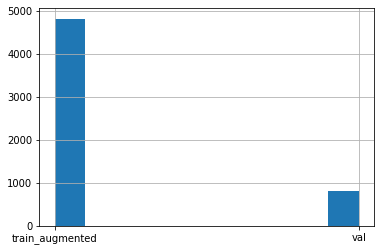

In [13]:
df.set.hist()

## Entrenamos

In [14]:
def splitter(df):
    train = df.index[df['set']!='val'].tolist()
    valid = df.index[df['set']=='val'].tolist()
    return train,valid

In [15]:
def get_x(r): return path/r['set']/r['clase']/r['nombre_imagen']
def get_y(r): return r['clase']

In [16]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(356),
                   batch_tfms=aug_transforms(do_flip=False,flip_vert=False))

In [17]:
dls = dblock.dataloaders(df,bs = 64)

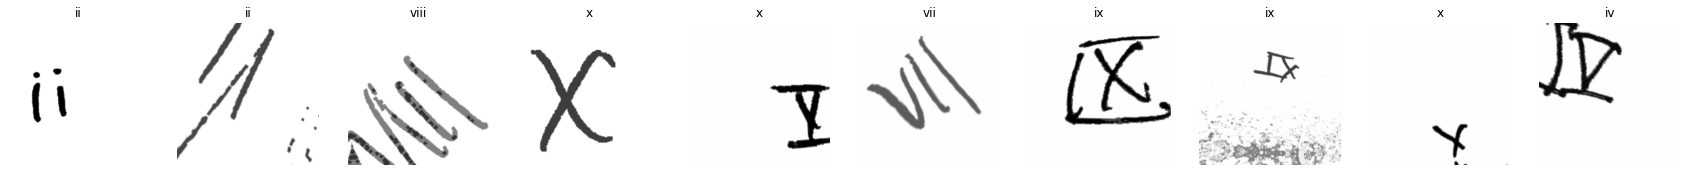

In [18]:
dls.train.show_batch(max_n=10, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet50, metrics=accuracy).to_fp16()

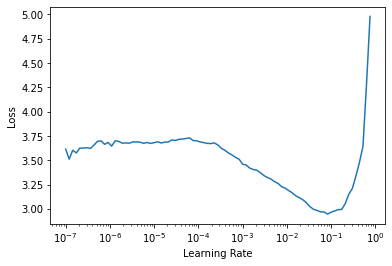

In [20]:
lr_min,lr_steep = learn.lr_find()

In [21]:
learn.fine_tune(30)

epoch,train_loss,valid_loss,accuracy,time
0,2.316270,4.514205,0.130703,01:02


epoch,train_loss,valid_loss,accuracy,time
0,1.343305,3.388705,0.156597,01:18
1,0.930435,5.983025,0.159063,01:17
2,0.684490,9.404858,0.147965,01:17
3,0.521971,6.653607,0.152898,01:17
4,0.435995,3.810364,0.188656,01:17
5,0.341347,3.867081,0.225647,01:17
6,0.310474,5.748096,0.110974,01:17
7,0.274450,3.232644,0.244143,01:17
8,0.243249,4.389126,0.176326,01:17
9,0.216327,2.773079,0.336621,01:17


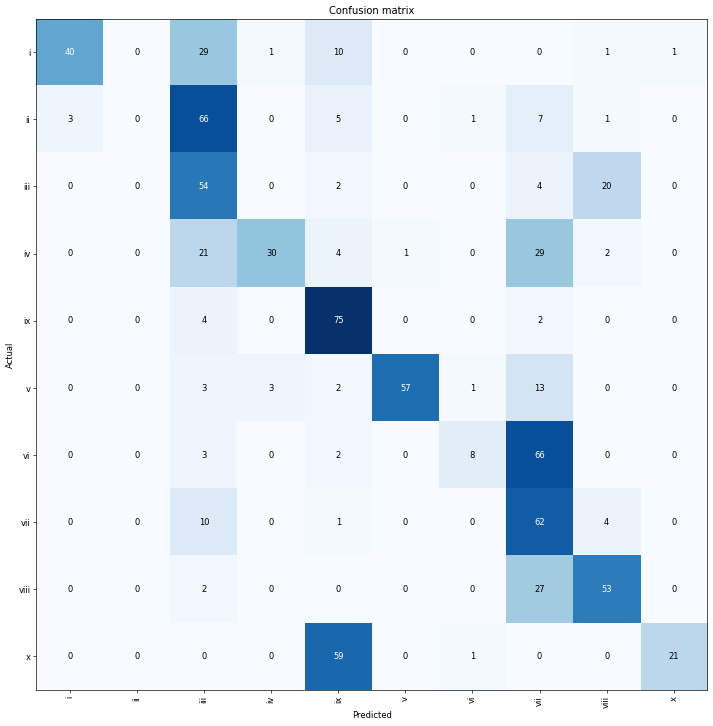

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

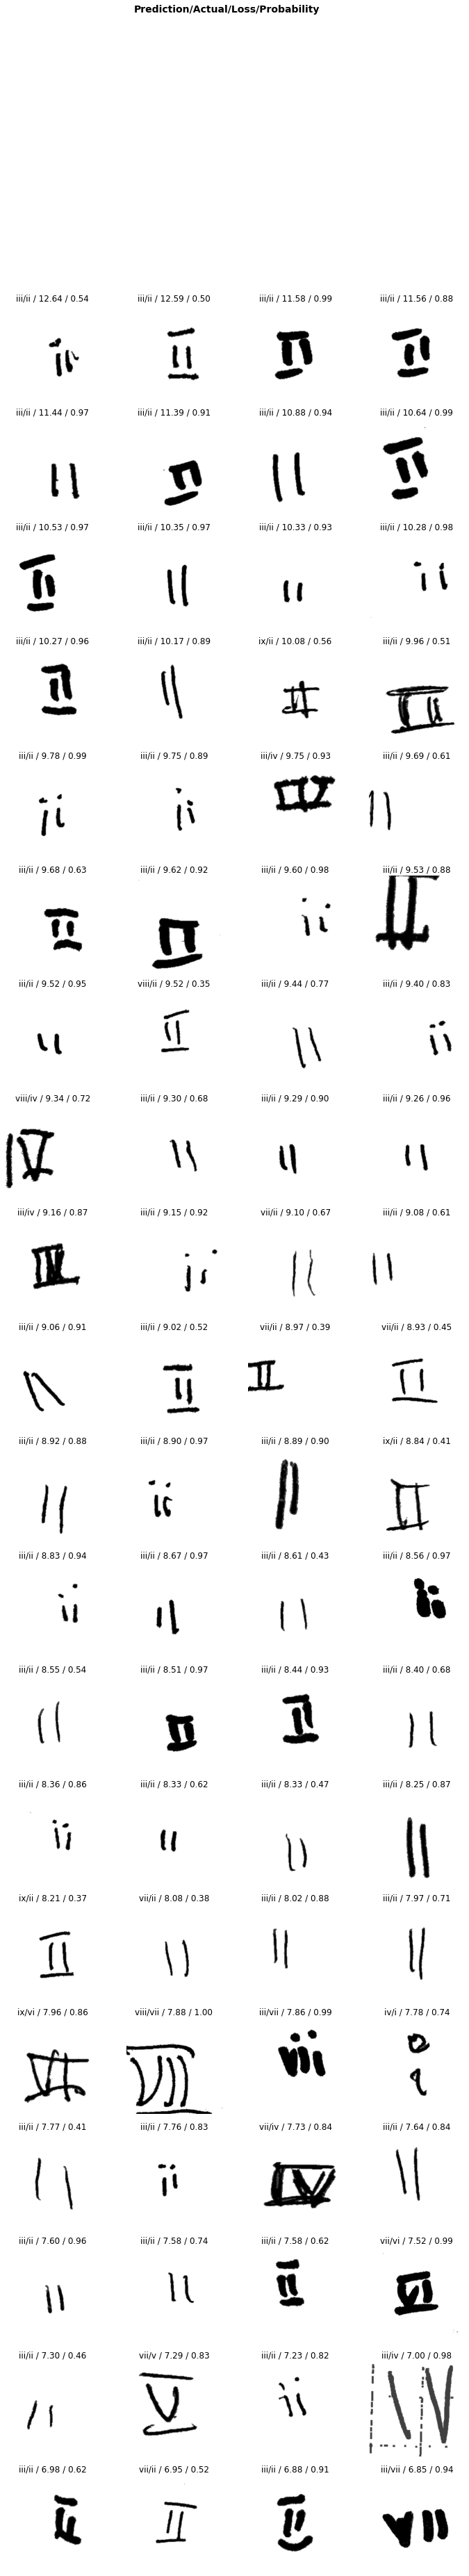

In [23]:
interp.plot_top_losses(80, nrows=20)

In [24]:
interp.most_confused(min_val=5)

[('ii', 'iii', 66),
 ('vi', 'vii', 66),
 ('x', 'ix', 59),
 ('i', 'iii', 29),
 ('iv', 'vii', 29),
 ('viii', 'vii', 27),
 ('iv', 'iii', 21),
 ('iii', 'viii', 20),
 ('v', 'vii', 13),
 ('i', 'ix', 10),
 ('vii', 'iii', 10),
 ('ii', 'vii', 7),
 ('ii', 'ix', 5)]